In [11]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from tqdm import tqdm


In [4]:

#!pip install pandarallel
import multiprocessing

num_processors = multiprocessing.cpu_count()
print(f'Available CPUs: {num_processors}')

import pandarallel
from pandarallel import pandarallel
pandarallel.initialize(nb_workers=num_processors-1, use_memory_fs=False, progress_bar=True)

from tqdm import tqdm
from collections import Counter
from itertools import chain

Available CPUs: 16
INFO: Pandarallel will run on 15 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [5]:
%%time

df = pd.read_parquet('06_sent_roberta_df.parquet', engine='pyarrow')
df.shape

CPU times: user 1min 21s, sys: 50.8 s, total: 2min 11s
Wall time: 1min 53s


(141130, 18)

In [6]:
df['year_month_utd'] = df['date'].dt.to_period('M')
df['year_month_utd']= df['year_month_utd'].map(lambda date: date.strftime("%Y %b"))


### Target 1 : GOOGLE

In [15]:
target_df = df[df['clean_text_sent'].str.contains('google', case=False)]

target_df.shape

(55427, 19)

In [16]:
tqdm.pandas()
# Apply sentiment analysis using TextBlob
target_df['sentiment'] = target_df['text'].progress_apply(lambda x: TextBlob(x).sentiment.polarity)

100%|██████████| 55427/55427 [07:56<00:00, 116.27it/s]
/var/tmp/ipykernel_154716/1152653280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['sentiment'] = target_df['text'].progress_apply(lambda x: TextBlob(x).sentiment.polarity)


/var/tmp/ipykernel_154716/653126594.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = target_df.groupby(pd.Grouper(key='date', freq='M')).mean()


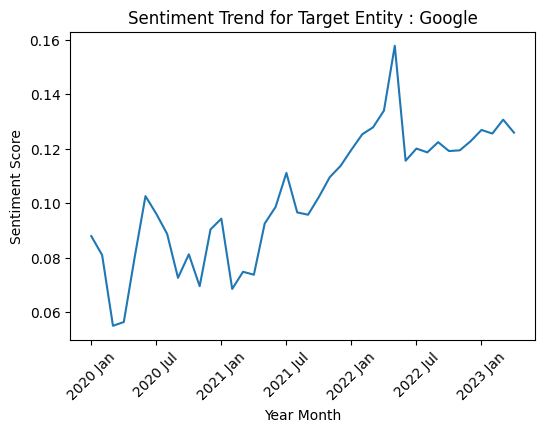

In [34]:
# Group data by time period (e.g., month) and calculate average sentiment
grouped_df = target_df.groupby(pd.Grouper(key='date', freq='M')).mean()

grouped_df.index = grouped_df.index.map(lambda date: date.strftime("%Y %b"))

# Plot the trend of sentiment over time
plt.figure(figsize=(6, 4))
plt.plot(grouped_df.index, grouped_df['sentiment'])
plt.title('Sentiment Trend for Target Entity : Google')
plt.xlabel('Year Month')
plt.ylabel('Sentiment Score')

# Convert the index values to a numeric format
x_ticks = range(len(grouped_df.index))

# Show only one in five ticks on the x-axis
n = len(x_ticks)
step = max(n // 5, 1)
plt.xticks(x_ticks[::6], grouped_df.index[::6], rotation = 45)


plt.show()

### Target 2 : MICROSOFT

In [20]:
target_df_micro = df[df['clean_text_sent'].str.contains('microsoft', case=False)]

target_df_micro.shape

(40982, 19)

In [21]:
tqdm.pandas()
# Apply sentiment analysis using TextBlob
target_df_micro['sentiment'] = target_df_micro['text'].progress_apply(lambda x: TextBlob(x).sentiment.polarity)

100%|██████████| 40982/40982 [05:58<00:00, 114.41it/s]
/var/tmp/ipykernel_154716/3343425048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df_micro['sentiment'] = target_df_micro['text'].progress_apply(lambda x: TextBlob(x).sentiment.polarity)


/var/tmp/ipykernel_154716/3349040859.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df_micro = target_df_micro.groupby(pd.Grouper(key='date', freq='M')).mean()


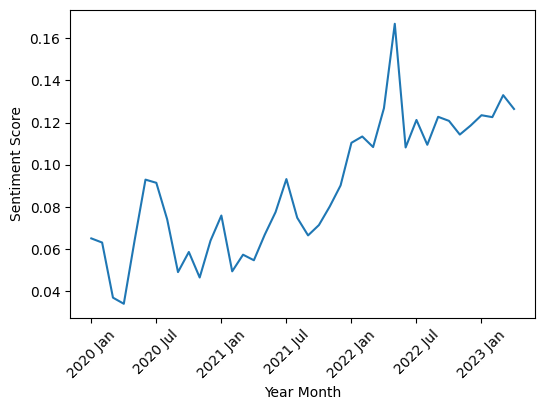

In [36]:
# Group data by time period (e.g., month) and calculate average sentiment
grouped_df_micro = target_df_micro.groupby(pd.Grouper(key='date', freq='M')).mean()

grouped_df_micro.index = grouped_df_micro.index.map(lambda date: date.strftime("%Y %b"))

# Plot the trend of sentiment over time
plt.figure(figsize=(6,4))
plt.plot(grouped_df_micro.index, grouped_df_micro['sentiment'])
#plt.title('Sentiment Trend for Target Entity : Microsoft')
plt.xlabel('Year Month')
plt.ylabel('Sentiment Score')

# Convert the index values to a numeric format
x_ticks = range(len(grouped_df_micro.index))

# Show only one in five ticks on the x-axis
n = len(x_ticks)
step = max(n // 5, 1)
plt.xticks(x_ticks[::6], grouped_df_micro.index[::6], rotation=45)


plt.show()

### Target 3 : CHATGPT

In [37]:
target_df_chat = df[df['clean_text_sent'].str.contains('chatgpt', case=False)]

target_df_chat.shape

(26001, 19)

In [38]:
tqdm.pandas()
# Apply sentiment analysis using TextBlob
target_df_chat['sentiment'] = target_df_chat['text'].progress_apply(lambda x: TextBlob(x).sentiment.polarity)

100%|██████████| 26001/26001 [03:37<00:00, 119.33it/s]
/var/tmp/ipykernel_154716/1013387551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df_chat['sentiment'] = target_df_chat['text'].progress_apply(lambda x: TextBlob(x).sentiment.polarity)


/var/tmp/ipykernel_154716/3836826954.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df_chat = target_df_chat.groupby(pd.Grouper(key='date', freq='M')).mean()


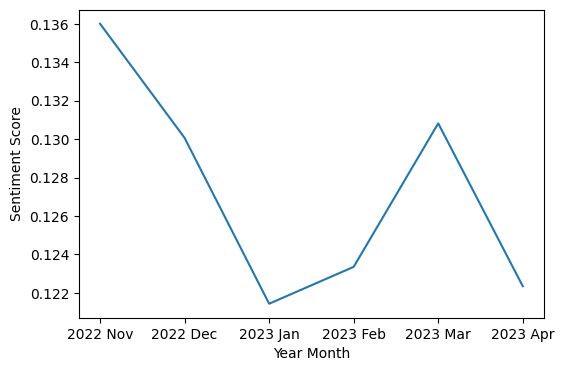

In [39]:
# Group data by time period (e.g., month) and calculate average sentiment
grouped_df_chat = target_df_chat.groupby(pd.Grouper(key='date', freq='M')).mean()

grouped_df_chat.index = grouped_df_chat.index.map(lambda date: date.strftime("%Y %b"))

# Plot the trend of sentiment over time
plt.figure(figsize=(6, 4))
plt.plot(grouped_df_chat.index, grouped_df_chat['sentiment'])
#plt.title('Sentiment Trend for Target Entity : ')
plt.xlabel('Year Month')
plt.ylabel('Sentiment Score')

# # Convert the index values to a numeric format
# x_ticks = range(len(grouped_df_chat.index))

# # Show only one in five ticks on the x-axis
# n = len(x_ticks)
# step = max(n // 5, 1)
# plt.xticks(x_ticks[::6], grouped_df_chat.index[::6], rotation=0)


plt.show()